In [1]:
import cv2 as cv # pip install opencv-contrib-python
from google.colab.patches import cv2_imshow
 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!git clone https://github.com/aleksei-riabykh/sberbank_data_analysis_06_07_21

Cloning into 'sberbank_data_analysis_06_07_21'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 137 (delta 31), reused 123 (delta 17), pack-reused 0
Receiving objects: 100% (137/137), 53.15 MiB | 24.50 MiB/s, done.
Resolving deltas: 100% (31/31), done.


##Задание № 1. Считаем круги
- Посчитать количество кругов на картинке с помощью OpenCV

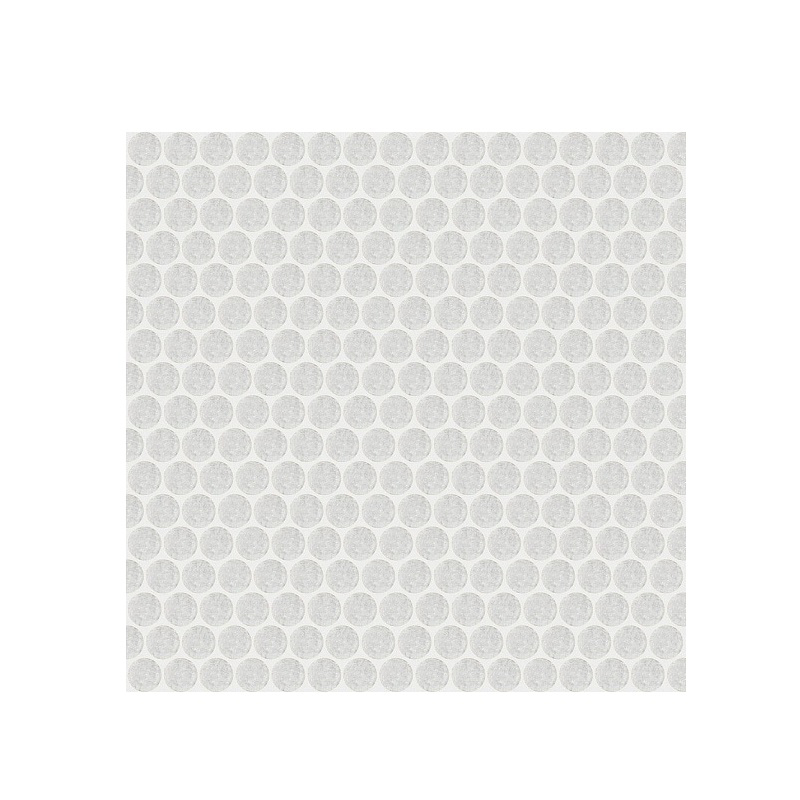

In [3]:
def show_my_image(img, title=None):
  #cv.namedWindow(title, cv.WINDOW_NORMAL)
  cv2_imshow(img)
  cv.waitKey(0)
  cv.destroyAllWindows()
  cv.waitKey(1) # для закрытия от клавиатуры, если не Windows

file_image = '/content/sberbank_data_analysis_06_07_21/data/images/bubbles_2.png'

image = cv.imread(file_image)  # file_image - имя файла, который будем анализировать
show_my_image(image)

Find out 255 circles


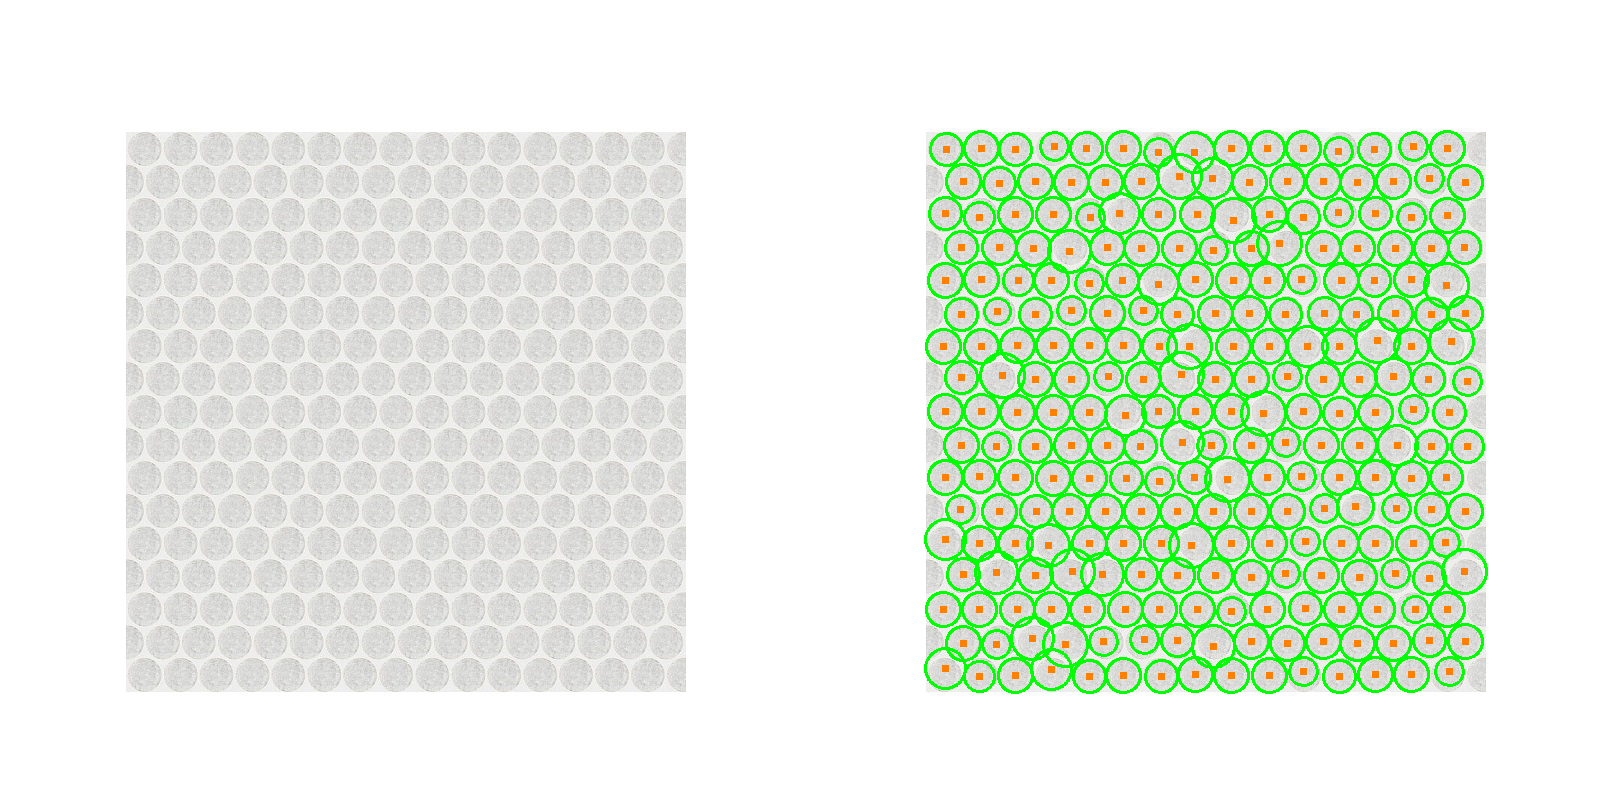

In [ ]:
# image: 8-bit, single channel image. If working with a color image, convert to grayscale first.

output = image.copy()
gray =  cv.cvtColor(output, cv.COLOR_BGR2GRAY)

# cv2.HoughCircles(image, method, dp, minDist)
# method: Defines the method to detect circles in images. Currently, the only implemented method is cv2.HOUGH_GRADIENT, which corresponds to the Yuen et al. paper (http://www.bmva.org/bmvc/1989/avc-89-029.pdf).
# dp: This parameter is the inverse ratio of the accumulator resolution to the image resolution (see Yuen et al. for more details). Essentially, the larger the dp gets, the smaller the accumulator array gets.
# minDist: Minimum distance between the center (x, y) coordinates of detected circles. If the minDist is too small, multiple circles in the same neighborhood as the original may be (falsely) detected. If the minDist is too large, then some circles may not be detected at all.
# param1: Gradient value used to handle edge detection in the Yuen et al. method.
# param2: Accumulator threshold value for the cv2.HOUGH_GRADIENT method. The smaller the threshold is, the more circles will be detected (including false circles). The larger the threshold is, the more circles will potentially be returned.
# minRadius: Minimum size of the radius (in pixels).
# maxRadius: Maximum size of the radius (in pixels).

# detect circles in the image
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1.2, minDist=15, param1=50, param2=30, minRadius=12, maxRadius=23)

# ensure at least some circles were found
if circles is not None:
  # convert the (x, y) coordinates and radius of the circles to integers
  circles = np.round(circles[0, :]).astype('int')
  print('Find out', len(circles), 'circles')
  # loop over the (x, y) coordinates and radius of the circles
  for (x, y, r) in circles:
    # draw the circle in the output image, then draw a rectangle
    # corresponding to the center of the circle
    cv.circle(output, (x, y), r, (0, 255, 0), 2)
    cv.rectangle(output, (x - 3, y - 3), (x + 3, y + 3), (0, 128, 255), -1)
    # show the output image
  cv2_imshow(np.hstack([image, output]))
  cv.waitKey(0)

##Задание № 2. Развешиваем картины
- Выделить все картины на фотографии
- Посчитать площадь картин.
- Подписать площадь каждой картины на фотографии

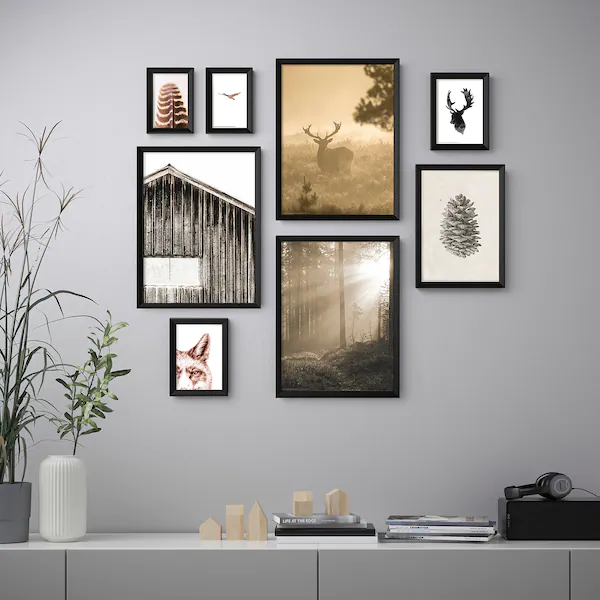

In [146]:
file_image = '/content/sberbank_data_analysis_06_07_21/data/images/pictures_2.jpg'

image = cv.imread(file_image)  # file_image - имя файла, который будем анализировать
show_my_image(image)

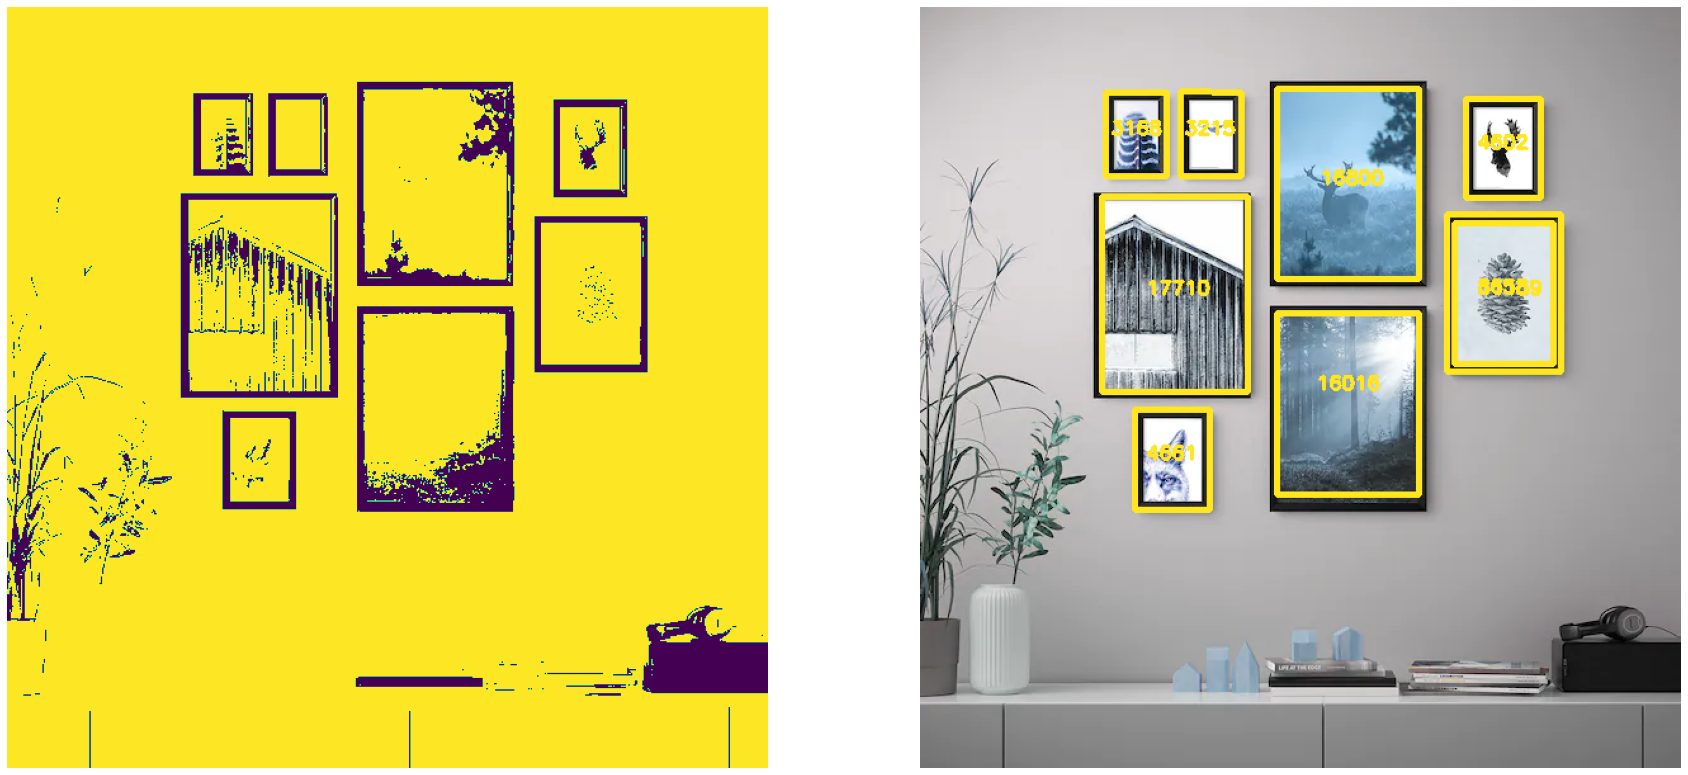

In [270]:
hsv_min = np.array((60, 60, 65), np.uint8)
hsv_max = np.array((255, 255, 255), np.uint8)

fn = file_image # имя файла, который будем анализировать
img = cv.imread(fn)

ret,thresh5 = cv.threshold(img,0,255,cv.THRESH_TOZERO)

thresh = cv.inRange(thresh5, hsv_min, hsv_max) # применяем цветовой фильтр

contours0, hierarchy = cv.findContours(thresh.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# перебираем все найденные контуры в цикле
for cnt in contours0:
  rect = cv.minAreaRect(cnt) # пытаемся вписать прямоугольник
  box = cv.boxPoints(rect) # поиск четырех вершин прямоугольника
  box = np.int0(box) # округление координат
  area = int(rect[1][0]*rect[1][1]) # вычисление площади
  if area > 3000 and area < 20000:
    cv.putText(img, str(area), (int(cv.moments(cnt)['m10']/cv.moments(cnt)['m00']-20), int(cv.moments(cnt)['m01']/cv.moments(cnt)['m00'])), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 230, 30), 2)
    cv.drawContours(img,[box],0,(255,230,30),3)

plt.figure(figsize=(30, 30))

plt.subplot(1, 2, 1)
plt.imshow(thresh) 
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img) 
plt.axis('off')
plt.show()